<a href="https://colab.research.google.com/github/VPonomarev42/LearningRep/blob/miniproject_1/stats/stats_miniproject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as snb

#**Задания** 
1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
3. На каких платформах произошло больше всего релизов?
4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?
5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?




---

---





1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

In [4]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/383837/games.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
data.shape

(16598, 11)

In [5]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
data.isna().value_counts()

Rank   Name   Platform  Year   Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
False  False  False     False  False  False      False     False     False     False        False           16291
                        True   False  False      False     False     False     False        False             249
                        False  False  True       False     False     False     False        False              36
                        True   False  True       False     False     False     False        False              22
dtype: int64

Видно, что присутствуют пропущенные значения в стобцах Year и Publisher. В сумме - 307 строк. Удалим эти строки





In [8]:
data.dropna(axis=0, how='any', inplace=True)

Проверим, что пропусков не осталось

In [9]:
data.isna().value_counts()

Rank   Name   Platform  Year   Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
False  False  False     False  False  False      False     False     False     False        False           16291
dtype: int64

2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

In [10]:
data.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

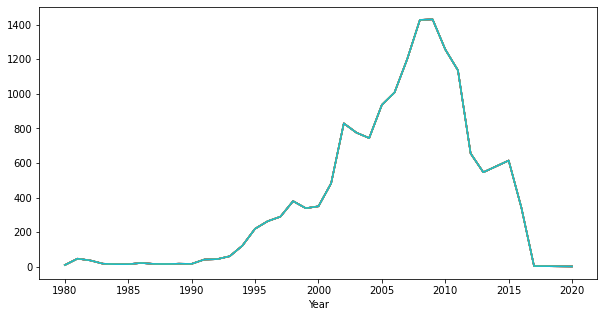

In [15]:
data.groupby('Year').count().plot(figsize=(10,5), legend=False)

3. На каких платформах произошло больше всего релизов?

In [31]:
top_platforms = data.groupby('Platform')\
            .count()\
            .rename(columns={'Rank':'count'})\
            .sort_values(by='count', ascending=False)[['count']]
top_platforms.head()

,count
Platform,
DS,2131
PS2,2127
PS3,1304
Wii,1290
X360,1234


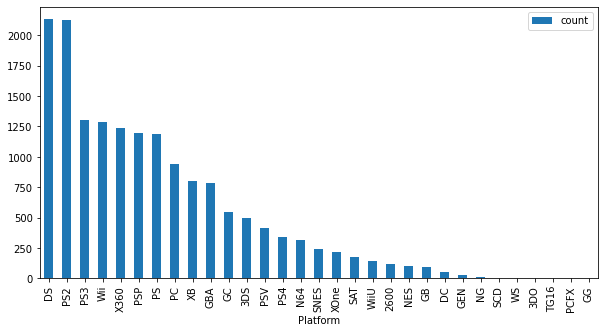

In [33]:
top_platforms.plot.bar(figsize=(10,5))

Как видно из графика и распределения, наибольшее количество релизов пришлось на платформы DS и PS2

4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [34]:
top_pubplishers = data.groupby('Publisher')\
            .count()\
            .rename(columns={'Rank':'count'})\
            .sort_values(by='count', ascending=False)[['count']]
top_pubplishers.head()

,count
Publisher,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823


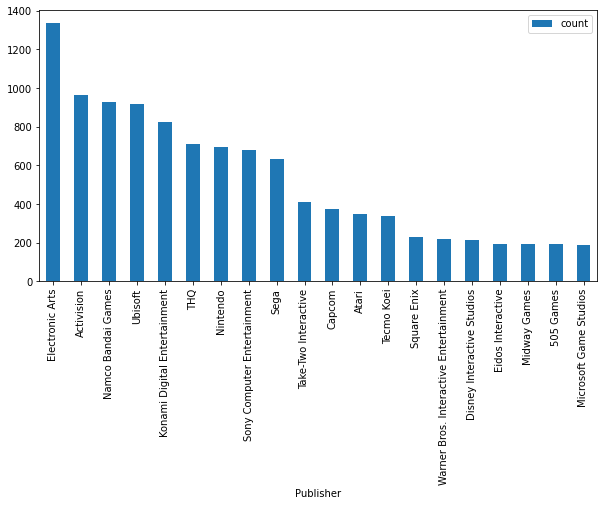

In [38]:
top_pubplishers.iloc[:20,:].plot.bar(figsize=(10,5))

Наибольшее количество игр приходится на издальство Electronic Arts